
### pentru invatarea supervizata





*import biblioteci pentru operatii cu arrays, plot(grafice)*

In [114]:
import numpy as np
import matplotlib.pyplot as plot

*import TensorFlow*

In [115]:
import tensorflow as tf

*preluare date cu poze din baza de date care este disponibila in tensorflow*

**mnist =** valorile din setul de date

In [116]:
mnist = tf.keras.datasets.mnist.load_data()

vizualizare date:

In [117]:
(x_train, y_train), (x_test, y_test) = mnist
print("train x")
print(x_train)
print("train y")
print(y_train)

print("test x")
print(x_test)
print("test t")
print(y_test)



train x
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
train y
[5 0 4 ... 5 6 8]
test x
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 

-----------------------------------

**Construirea RN: retea neuronala**
```
input Layer -> Hidden Layer -> Output Layer

```




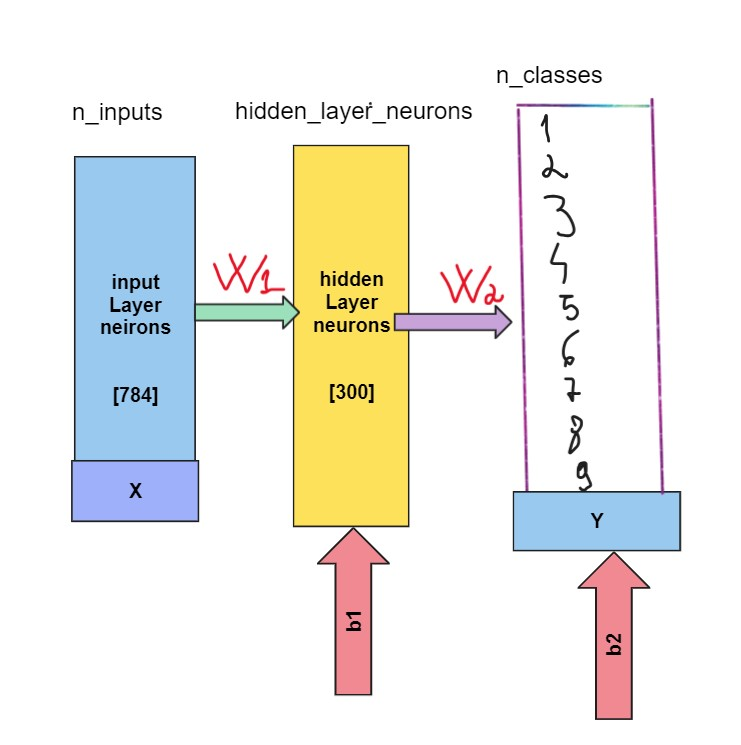



---


Parametrii retelei neuronale:

1.   nr_inputuri(neuronii din input) = 784
2.   nr neuroni din straturile ascunse(hidden_layers) = 300
3.   nr output(nr clase = rezultate de clasificare) = 10 (cifrele 0..10)

In [118]:
n_input = 784
hidden_layer_neurons = 300
n_classes = 10


Parametrii de training

1. rata de invatare = 0.005
2. epoci de invatare = 30000
3. dimensiunea unui batch = 50


In [119]:
learning_rate = 0.005
training_epochs =30000
batch_size = 50

Creating TensorFlow Variables & Model

In [120]:
#inputs
# trebuie folosita aceasta functie, altfel, la rulari multiple--> eroare
tf.compat.v1.disable_eager_execution()

x = tf.compat.v1.placeholder(tf.float32, shape=[None, n_input])

# outputs
y = tf.compat.v1.placeholder(tf.float32, shape=[None, n_classes])

print(x)


Tensor("Placeholder_14:0", shape=(None, 784), dtype=float32)


# Create weights:
Obs:
pentru toate layerele ascunse si output, avem nevoie de de W si b

In [121]:
#
w1 = tf.Variable(tf.random.normal([n_input, hidden_layer_neurons]))
# rezultat (folosindu-de distributia Gaussiana): media =0, deviatia standard =1
w1

<tf.Variable 'Variable_22:0' shape=(784, 300) dtype=float32>

In [122]:
w2 = tf.Variable(tf.random.normal([hidden_layer_neurons, n_classes]))
w2

<tf.Variable 'Variable_23:0' shape=(300, 10) dtype=float32>

In [123]:
b1 = tf.Variable(tf.random.normal([hidden_layer_neurons]))
# array de 300 coloane si 1 linie
b1

<tf.Variable 'Variable_24:0' shape=(300,) dtype=float32>

In [124]:
b2 = tf.Variable(tf.random.normal([n_classes]))
# array de 1 linie si 10 coloane
b2

<tf.Variable 'Variable_25:0' shape=(10,) dtype=float32>

#Create **MULTILAYER PERCEPTRON MODEL** [2]


---

Obs: se calculeaza functiile de activare pentru fiecare neuron, utilizandu-se W, b, x, y
```
1. Pentru Hidden Layer 1, vom folosi: layer intrare: x, w1, b1
2. Pentru Output Layer, vom folosi: layer-ul anterior, W2, b2
```

Daca am fi avut mai multe hidden layers: foloseam layer-ul anterior, impreuna cu w, b specifice
```
functia de activare:
sigmoid=(layer_anterior * W) + B


In [125]:
# sigmoid - functia de activare

#
hidden_layer = tf.nn.sigmoid(tf.add(tf.matmul(x, w1), b1))
output_layer = tf.add(tf.matmul(hidden_layer, w2),b2)


# Functia de cost
1. softmax, transforma output-urile in probabilitati
2. este folosita pe layer-ul de output

In [126]:
#Atentie la ordinea parametrilor, apare eroare:

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output_layer))
cost

<tf.Tensor 'Mean_5:0' shape=() dtype=float32>

# Optimizator(minimizeaza costul)- Adam [2]

In [127]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Acuratetea

In [128]:
# argmax: tensorul maxim
correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
# cast: ca in C, conversie la alt tip
correct_prediction = tf.cast(correct_prediction, tf.float32)

# ******************************Acuratetea*****************************
accuracy = tf.reduce_mean(correct_prediction)
print(f'acuratetea: {accuracy}')



acuratetea: Tensor("Mean_6:0", shape=(), dtype=float32)


Model

# Analizarea acuratetii
```
ceva nu e ok inca -nu pot calcula acuratetea din fiecare epoca
```




In [137]:
train_accuracies = []
validation_accuracies = []
epoc_iteration = []

sess = ess = tf.compat.v1.Session()
# luarea a cate batch size elemente
for epoch in range(0, len(x_train), training_epochs):
  batch_x = x_train[epoch:epoch+training_epochs]
  batch_y = y_train[epoch:epoch+training_epochs]

    # Optionally, calculate and print the training accuracy
  #train_ac = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
  print("Training Accuracy:", accuracy)


Training Accuracy: Tensor("Mean_6:0", shape=(), dtype=float32)
Training Accuracy: Tensor("Mean_6:0", shape=(), dtype=float32)


Acuratetea si Validare-fial results

In [169]:
m1 = tf.keras.metrics.Accuracy()
m1.update_state(
    y, output_layer, sample_weight=None
)
print(m1.result())


Tensor("Identity_7:0", shape=(), dtype=float32)


Biblio:


1. https://pythonguides.com/tensorflow-placeholder/
2. https://github.com/ArdeleanRichard/University-Projects/tree/main/Python/MachineLearning/LetterRecognition

